# Time Series

- https://otexts.com/fpp2/intro.html

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.seasonal import seasonal_decompose

# Import Dataset

In [2]:
df = pd.read_csv("./data/nybirth.csv", parse_dates=["date"], index_col="date")
df.head()

,births
date,
1946-01-01,26.663
1946-02-01,23.598
1946-03-01,26.931
1946-04-01,24.740
1946-05-01,25.806


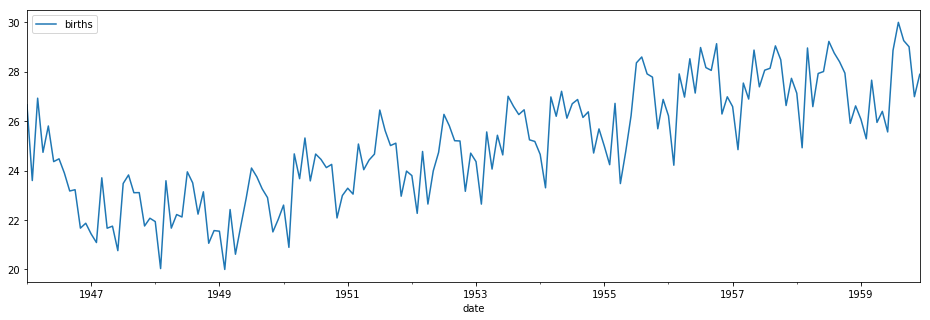

In [3]:
df.plot(y="births", figsize=(16, 5))

# Time Series Classical Components

A simple method of describing a time series is a classical decomposition: a proposition that a series can be decomposed into three main elements:

- Trend (Tt): long term movements in the mean
- Seasonal (St): repeated seasonal fluctuations (think: calendar or business cycles)
- Residuals (Et): Irregular components or random fluctuations not captured by the Trend and Seasonal

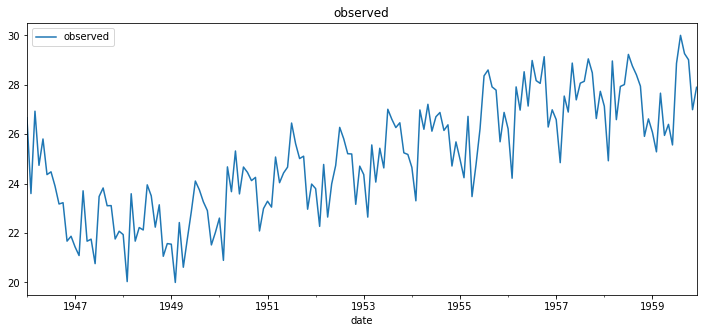

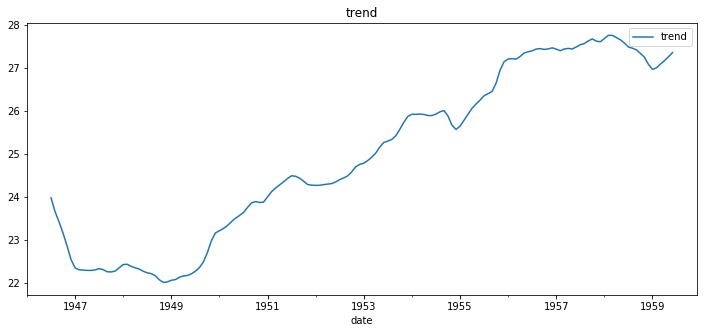

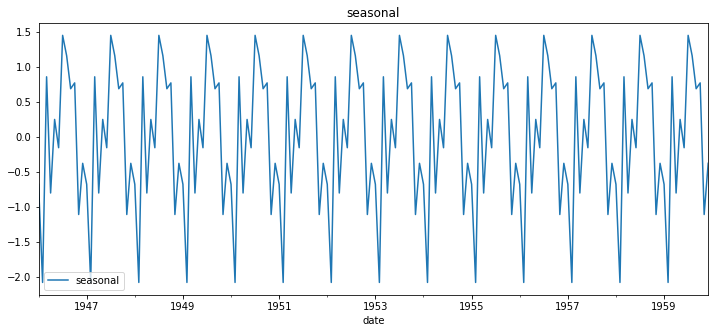

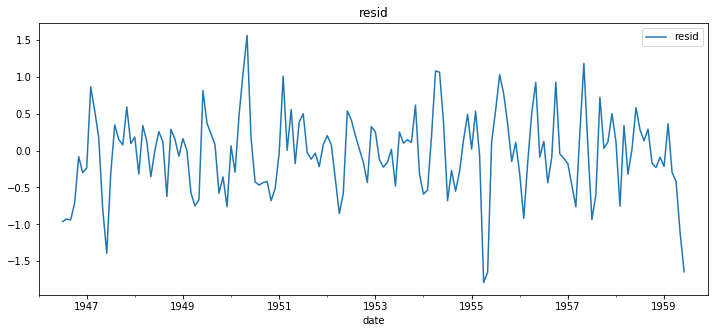

In [4]:
decomposed_df = df.copy()
result = seasonal_decompose(decomposed_df.births, model='additive', freq=12)
decomposed_df["trend"] = result.trend
decomposed_df["seasonal"] = result.seasonal
decomposed_df["resid"] = result.resid
decomposed_df["observed"] = result.observed

for col in ["observed", "trend", "seasonal", "resid"]:
    decomposed_df.plot(y=col, figsize=(12, 5), title=col)

# Additive

y(t) = Trend + Seasonality + Noise

In [5]:
add = pd.read_csv("data/daily_min_temp.csv", index_col="Date", parse_dates=["Date"])
add.head()

,Temp
Date,
1981-01-01,20.7
1981-01-02,17.9
1981-01-03,18.8
1981-01-04,14.6
1981-01-05,15.8


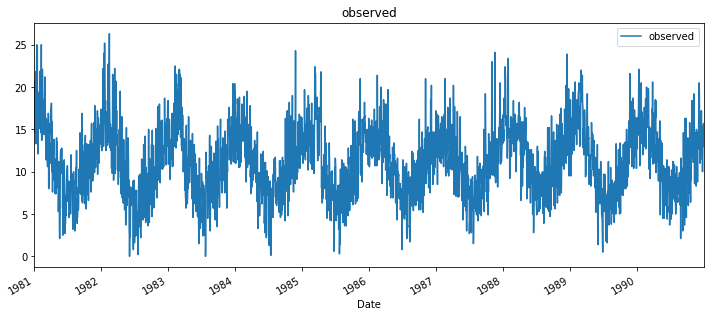

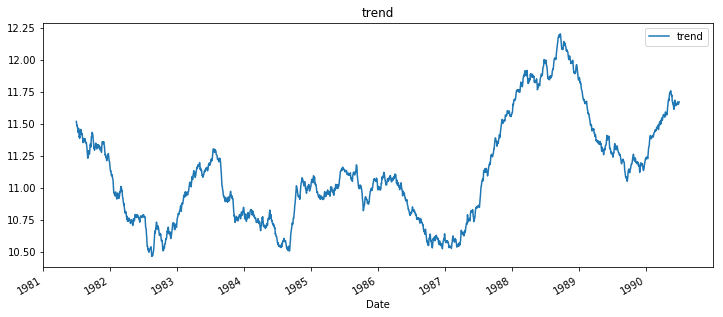

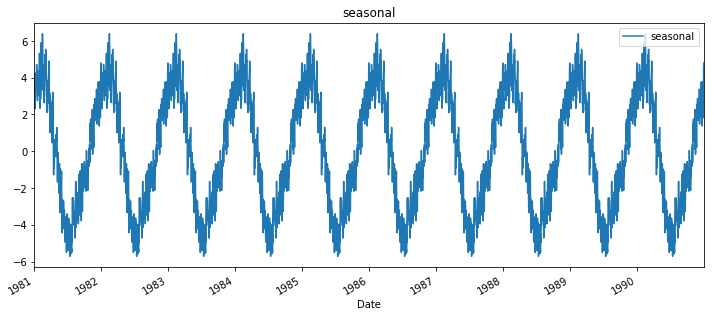

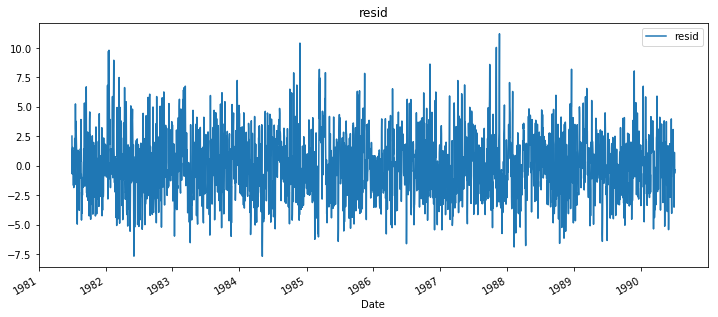

In [6]:
decomposed_df = add.copy()
result = seasonal_decompose(decomposed_df.Temp, model='additive', freq=365)
decomposed_df["trend"] = result.trend
decomposed_df["seasonal"] = result.seasonal
decomposed_df["resid"] = result.resid
decomposed_df["observed"] = result.observed

for col in ["observed", "trend", "seasonal", "resid"]:
    decomposed_df.plot(y=col, figsize=(12, 5), title=col)

# Multiplicative

y(t) = Trend * Seasonality * Noise

In [7]:
mul = pd.read_csv("data/airline.csv", index_col="Date")
mul.head()

,passengers
Date,
1949-01,112
1949-02,118
1949-03,132
1949-04,129
1949-05,121


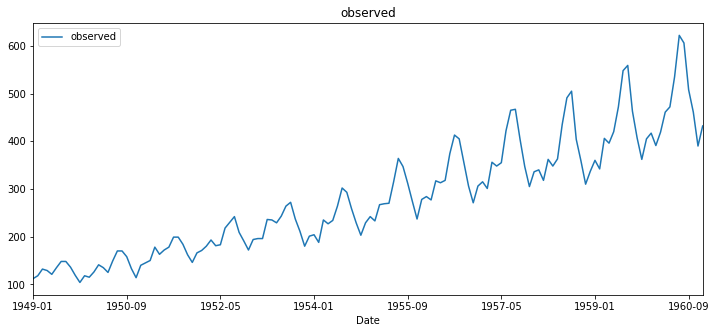

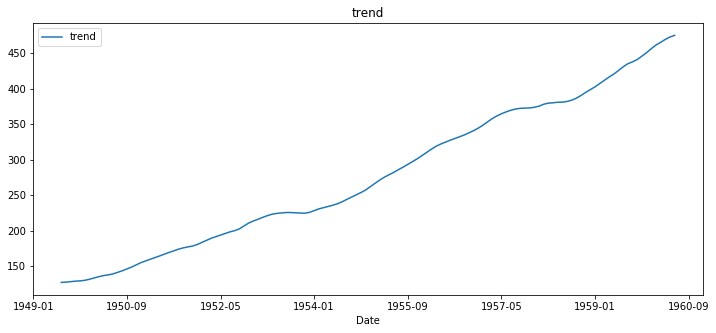

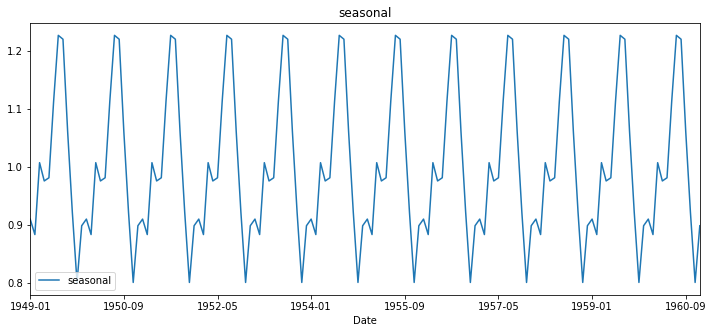

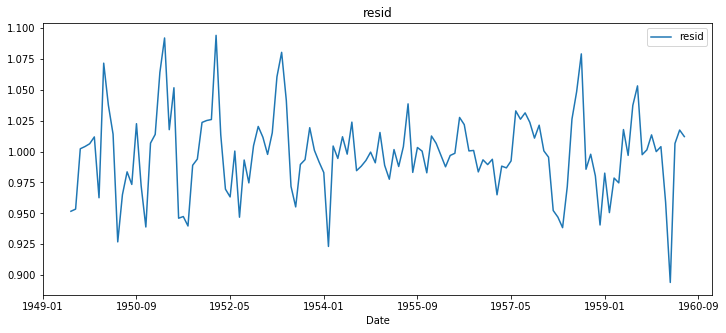

In [8]:
decomposed_df = mul.copy()
result = seasonal_decompose(decomposed_df.passengers, model='multiplicative', freq=12)
decomposed_df["trend"] = result.trend
decomposed_df["seasonal"] = result.seasonal
decomposed_df["resid"] = result.resid
decomposed_df["observed"] = result.observed

for col in ["observed", "trend", "seasonal", "resid"]:
    decomposed_df.plot(y=col, figsize=(12, 5), title=col)

# White Noise

In [9]:
from random import gauss
from random import seed

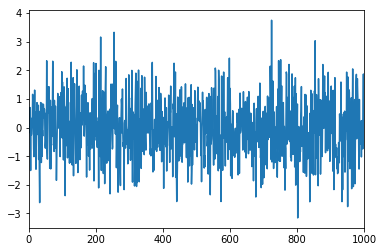

In [10]:
seed(42)
series = [gauss(0.0, 1.0) for i in range(1000)]
series = pd.Series(series)
series.plot()

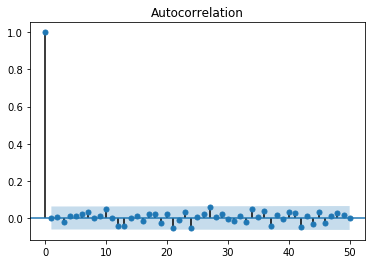

In [11]:
plot_acf(series, lags=50);

# Random Walk

A random walk is different from a list of random numbers because the next value in the sequence is a modification of the previous value in the sequence. The best prediction for random walk is using current value or previous value

In [12]:
from statsmodels.tsa.stattools import adfuller

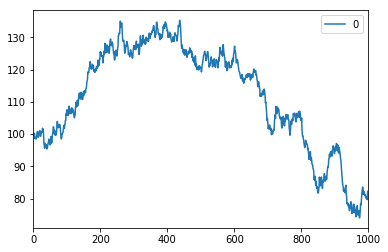

In [13]:
rwalk = pd.DataFrame(100 + np.cumsum(series))
rwalk.plot()

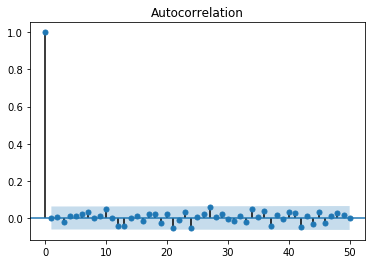

In [14]:
plot_acf(series, lags=50);

## Dicky-Fuller Test

Sebuah uji yang bisa menunjukkan apakah suatu time-series itu random walk atau bukan

jika score p-value > 0.05, maka itu random walk

# Autocorrelation

In [15]:
from statsmodels.graphics.tsaplots import plot_acf

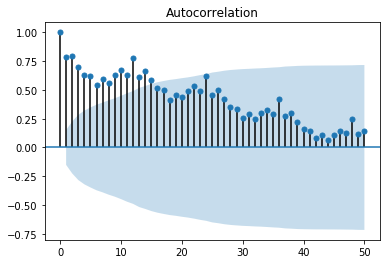

In [17]:
plot_acf(df.births, lags=50);